In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, mean_squared_error, r2_score

In [ ]:
filename = 'Dataset_TeslaStock.csv'

df = pd.read_csv(filename)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,GDP,BIR,CPI,IR
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,14980.193,1.83,0.020038,0.52
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,14980.193,1.82,0.020038,0.52
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,15141.607,1.75,0.052955,0.41
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,15141.607,1.73,0.052955,0.41
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,15141.607,1.69,0.052955,0.41


# **CHECK DATA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
 7   GDP        1692 non-null   float64
 8   BIR        1678 non-null   float64
 9   CPI        1692 non-null   float64
 10  IR         1692 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 145.5+ KB


In [ ]:
# Check missing values
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0
GDP,0
BIR,14
CPI,0


In [ ]:
# Resolving the missing values
df['BIR'] = df['BIR'].fillna(df['BIR'].median())

In [ ]:
# Check missing values again
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Adj Close,0
GDP,0
BIR,0
CPI,0


In [ ]:
# Get the Numerical Features of the Data
numerical_features = df.select_dtypes(include='number').columns.to_list()
numerical_features

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Adj Close',
 'GDP',
 'BIR',
 'CPI',
 'IR']

In [ ]:
# Get the Categorical Feature of the Data
categorical_features = df.select_dtypes(exclude='number').columns.to_list()
categorical_features

['Date']

In [ ]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close,GDP,BIR,CPI,IR
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000,1692.000000,1692.000000,1692.000000,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658,17045.116176,2.015408,1.111208,0.312423
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187,1291.563297,0.325176,0.804269,0.206379
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000,14980.193000,1.180000,-0.226851,0.110000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999,15647.680000,1.760000,0.370690,0.150000
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004,17192.019000,2.090000,1.039902,0.250000
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503,18401.626000,2.250000,1.723432,0.410000
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009,18892.639000,2.640000,2.987311,0.980000


# **DATA VISUALIZATION**

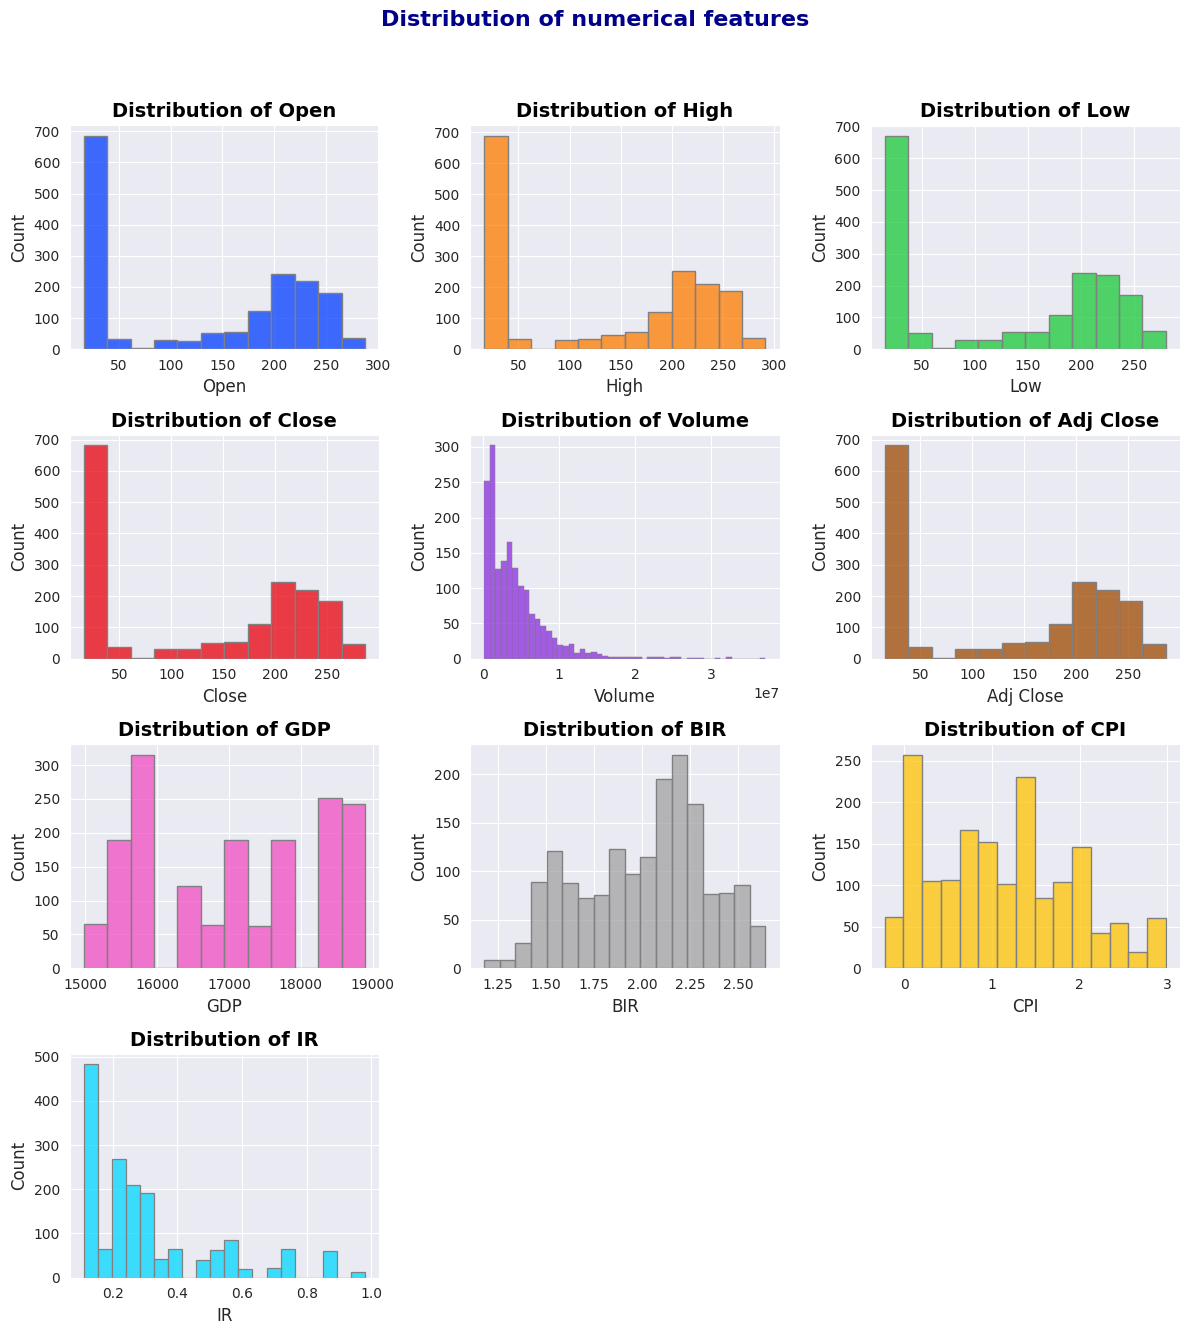

In [ ]:
# Distribution of numerical features
sns.set_style(style="darkgrid")
colors = sns.color_palette(palette='bright', n_colors=len(numerical_features))
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 14))
axs = axs.flat

for i, num_feat in enumerate(numerical_features):
    sns.histplot(df[num_feat], kde=False, color=colors[i], ax=axs[i], edgecolor="gray")
    axs[i].set_xlabel(num_feat, fontsize=12)
    axs[i].set_ylabel("Count", fontsize=12)  # Count of the distribution
    axs[i].set_title(f"Distribution of {num_feat}", fontsize=14, fontweight='bold', color="black")

# Remove any empty subplots
for j in range(len(numerical_features), len(axs)):
    fig.delaxes(axs[j])

fig.suptitle("Distribution of numerical features", fontsize=16, fontweight="bold", color="darkblue")
fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # The layout
plt.show()

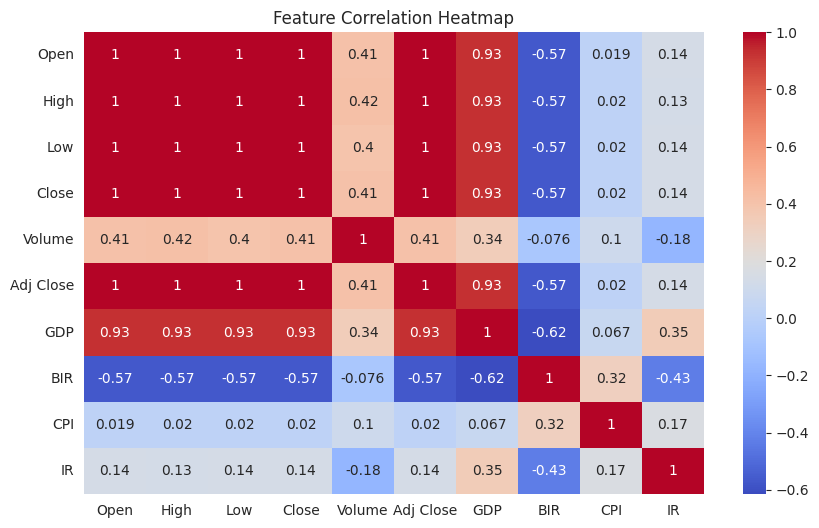

In [ ]:
df_corr = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close', 'GDP',	'BIR',	'CPI',	'IR']]

# Correlation Heatmap for feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# **FEEDFORWARD NEURAL NETWORK (FFNN) FOR TIMESERIES**

# **Split Data into Training and Testing sets for FFNN**

In [ ]:
# Define the split index
split_index = int(len(df) * 0.8)

# Ensures the data is split in chronological order, which is crucial for time-series data.
# Split into training and testing sets
dataset_train_FFNN = df.iloc[:split_index]  # First 80% for training
dataset_test_FFNN = df.iloc[split_index:]  # Remaining 20% for testing

# Display the shapes of the splits
print(f"Training Set: {dataset_train_FFNN.shape}")
print(f"Testing Set: {dataset_test_FFNN.shape}")

Training Set: (1353, 11)
Testing Set: (339, 11)


In [ ]:
print(dataset_train_FFNN.head(3))
print("\n")
print(dataset_train_FFNN.isnull().sum())
print("\n")
print(dataset_train_FFNN.info())
print("\n")
print(dataset_train_FFNN.describe())

        Date       Open   High        Low      Close    Volume  Adj Close  \
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999   
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000   
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999   

         GDP   BIR       CPI    IR  
0  14980.193  1.83  0.020038  0.52  
1  14980.193  1.82  0.020038  0.52  
2  15141.607  1.75  0.052955  0.41  


Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
GDP          0
BIR          0
CPI          0
IR           0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1353 non-null   object 
 1   Open       1353 non-null   float64
 2   High       1353 non-null   float64
 3   Low        1353 non-null   float64
 4   Close    

In [ ]:
print(dataset_test_FFNN.head(3))
print("\n")
print(dataset_test_FFNN.isnull().sum())
print("\n")
print(dataset_test_FFNN.info())
print("\n")
print(dataset_test_FFNN.describe())

            Date        Open        High         Low       Close   Volume  \
1353  11/11/2015  217.770004  219.479996  213.630005  219.080002  3347800   
1354  11/12/2015  217.850006  219.000000  212.660004  212.940002  2915900   
1355  11/13/2015  212.949997  212.990005  206.520004  207.190002  3430300   

       Adj Close        GDP   BIR       CPI    IR  
1353  219.080002  18435.137  2.09  0.090472  0.25  
1354  212.940002  18435.137  1.54  0.090472  0.25  
1355  207.190002  18435.137  1.52  0.090472  0.25  


Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
GDP          0
BIR          0
CPI          0
IR           0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 1353 to 1691
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       339 non-null    object 
 1   Open       339 non-null    float64
 2   High       339 non-null    

In [ ]:
# Training data should have "Open" value
dataset_train_FFNN.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,GDP,BIR,CPI,IR
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,14980.193,1.83,0.020038,0.52
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,14980.193,1.82,0.020038,0.52


In [ ]:
# Training_set get all rows and "1:2" mean get the "Open" column
training_set_FFNN = dataset_train_FFNN.iloc[:, 1:2]
print(training_set_FFNN.shape)

(1353, 1)


# **Converting into Numpy Array**

In [ ]:
training_set_FFNN.values

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [230.699997],
       [232.990005],
       [223.479996]])

# **Normalize the training set**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
# feature_range = (0, 1), it can scale between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled_FFNN = sc.fit_transform(training_set_FFNN)
print(training_set_scaled_FFNN[:5])

[[0.01053291]
 [0.03553936]
 [0.03262991]
 [0.02526425]
 [0.01421574]]


In [ ]:
training_set_scaled_FFNN.shape

(1353, 1)

# **X_train_FFNN and y_train_FFNN**

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train_FFNN = []
y_train_FFNN = []

for i in range(60, training_set_scaled_FFNN.shape[0]):
    # X_train 0-59
    X_train_FFNN.append(training_set_scaled_FFNN[i-60:i, 0])
    # Y_train would be 60th value based on past 60 values (Need to take the 60th value, we need to look 60 timesteps back)
    # The 0 means that we pick the first column, the "Open" column
    y_train_FFNN.append(training_set_scaled_FFNN[i, 0])

# Convert into Numpy Array
X_train_FFNN, y_train_FFNN = np.array(X_train_FFNN), np.array(y_train_FFNN)
print(X_train_FFNN.shape)
print(y_train_FFNN.shape)

# 60 means 60 timesteps back
# 1293 is the expected output or true output

(1293, 60)
(1293,)


# **Build FFNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Initialising the FFNN
FFNN_model = Sequential()

# Adding the first layer and some Dropout regularisation
FFNN_model.add(Dense(64, activation='relu', input_dim=X_train_FFNN.shape[1]))
FFNN_model.add(Dropout(0.2))

# Adding the second layer and some Dropout regularisation
FFNN_model.add(Dense(32, activation='relu'))
FFNN_model.add(Dropout(0.2))

# Adding the third layer
FFNN_model.add(Dense(16, activation='relu'))

# Linear output layer
FFNN_model.add(Dense(1))

# Compiling the FFNN
FFNN_model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fitting the FFNN to the Training set
history = FFNN_model.fit(X_train_FFNN, y_train_FFNN, epochs = 60, batch_size = 32, validation_split=0.1)

Epoch 1/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1247 - val_loss: 0.0406
Epoch 2/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0209 - val_loss: 0.0057
Epoch 3/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131 - val_loss: 0.0143
Epoch 4/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120 - val_loss: 0.0147
Epoch 5/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086 - val_loss: 0.0061
Epoch 6/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0087 - val_loss: 0.0162
Epoch 7/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097 - val_loss: 0.0141
Epoch 8/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - val_loss: 0.0387
Epoch 9/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070 - val_loss: 0.0075
Epoch 10/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0064 - val_loss: 0.0137
Epoch 11/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059 - val_loss: 0.0085
Epoch 12/60
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0063 - val_lo

In [ ]:
FFNN_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 64)                  │           3,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,589 (76.52 KB)

 Trainable params: 6,529 (25.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,060 (51.02 KB)

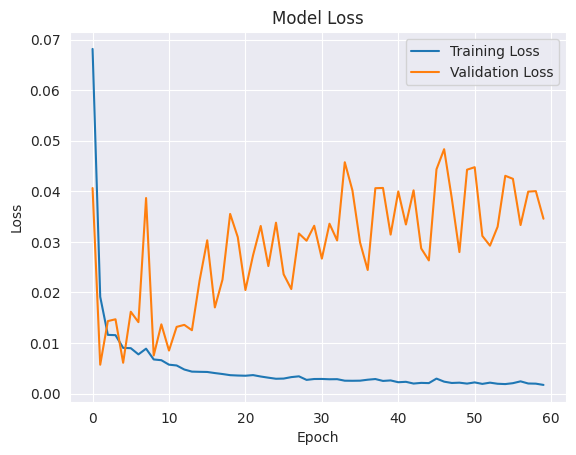

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()  # Add a legend to differentiate between training and validation loss
plt.show()

# **Making the predictions and visualizing the result**

In [ ]:
dataset_test_FFNN.head(2)
real_stock_price = dataset_test_FFNN.iloc[:, 1:2].values
print(real_stock_price.shape)
print(real_stock_price.T)

(339, 1)
[[217.770004 217.850006 212.949997 206.089996 215.199997 214.5
  220.539993 223.490005 217.350006 215.369995 221.339996 231.059998
  231.789993 231.059998 237.       235.479996 232.460007 227.699997
  227.520004 226.699997 224.710007 225.240005 217.509995 221.820007
  222.100006 233.940002 232.889999 231.690002 234.990005 232.179993
  230.559998 231.490005 230.059998 236.600006 238.509995 230.720001
  226.360001 220.       214.190002 217.860001 214.009995 211.600006
  212.009995 202.210007 198.970001 208.710007 199.399994 201.550003
  204.800003 200.059998 196.699997 192.380005 190.789993 189.949997
  188.759995 192.419998 183.589996 170.699997 171.300003 157.100006
  142.320007 150.5      152.       155.       158.699997 159.
  172.419998 163.660004 170.119995 176.160004 172.75     178.649994
  188.699997 192.399994 194.25     183.729996 188.279999 198.
  197.679993 203.5      204.520004 210.       207.929993 212.649994
  214.270004 218.       221.470001 229.100006 235.339996

In [ ]:
dataset_test_FFNN.shape

(339, 11)

# **Combine Train and Test Dataset into 1 Dataframe**

In [ ]:
dataset_total = pd.concat((dataset_train_FFNN['Open'], dataset_test_FFNN['Open']), axis=0)

In [ ]:
dataset_total.shape

(1692,)

In [ ]:
# Getting the predicted stock price
# len(dataset_total) --> Total 1692 rows
# len(dataset_test) --> 339 rows
# result When we subtract we get Original Dataset
# We need previous 60 to predict New so we do -60 (60 timesteps back)
# That would be the inputs
inputs = dataset_total[len(dataset_total) - len(dataset_test_FFNN) - 60:].values

# Need to Reshape (1 because there is 1 feature column only)
inputs = inputs.reshape(-1, 1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 399):
  X_test.append(inputs[i-60:i, 0])

# Convert into Numpy array
X_test = np.array(X_test)
print(X_test.shape)
print("\n")

# Pass to Model
predicted_stock_price_FFNN = FFNN_model.predict(X_test)
print(predicted_stock_price_FFNN.shape)
print(predicted_stock_price_FFNN.T)
print("\n")

#Do inverse Transformation to get Values
predicted_stock_price_FFNN = sc.inverse_transform(predicted_stock_price_FFNN)
print(predicted_stock_price_FFNN.T)

(339, 60)


 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
(339, 1)
[[0.59999245 0.5971805  0.602739   0.5983706  0.60424006 0.6006384
  0.5995549  0.6066823  0.6097628  0.60745263 0.61019313 0.6131401
  0.61484146 0.62402534 0.62172693 0.6327387  0.6304364  0.6410389
  0.6437373  0.6457726  0.64090115 0.63920677 0.6388099  0.6325531
  0.62994504 0.6167719  0.6244893  0.62281245 0.62301266 0.6220292
  0.62779033 0.62824553 0.63321066 0.6333361  0.6318213  0.6353151
  0.6351222  0.63432604 0.62997574 0.61980516 0.6106247  0.60970455
  0.60318804 0.59470755 0.5915517  0.5863391  0.5854333  0.5749777
  0.5643155  0.5625185  0.56160617 0.5609617  0.55691695 0.5543456
  0.5529251  0.5487088  0.54727566 0.53989875 0.52974147 0.5228496
  0.5175505  0.5073992  0.50059575 0.49366897 0.4874575  0.4829226
  0.47976774 0.47620863 0.47812653 0.4856153  0.48904252 0.4947493
  0.49325532 0.50062376 0.5165359  0.5207245  0.5258378  0.5318926
  0.5392993  0.54753923 0.55291575 0.5626766  0.56915534 0.5725525
  0.58492655 

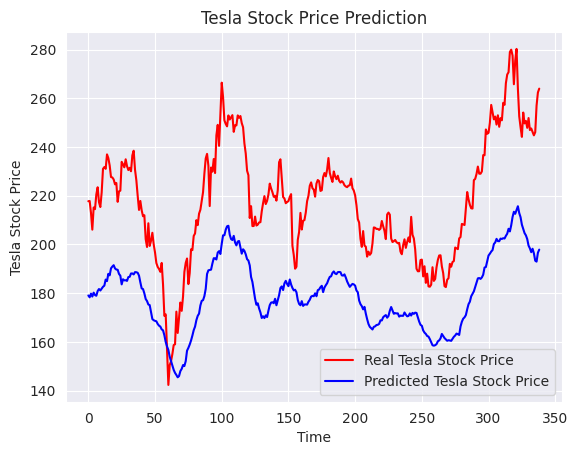

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price_FFNN, color = 'blue', label =
         'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_FFNN_TS = mean_squared_error(real_stock_price, predicted_stock_price_FFNN)
r2_FFNN_TS = r2_score(real_stock_price,predicted_stock_price_FFNN)
print("Mean Squared Error of FFNN Timeseries: ", mse_FFNN_TS)
print("R2 Score of FFNN Timeseries: ", r2_FFNN_TS)

Mean Squared Error of FFNN Timeseries:  1589.5498677298651
R2 Score of FFNN Timeseries:  -1.6630109510615076


# **FEEDFORWARD NEURAL NETWORK (FFNN) NORMAL REGRESSION**

# **Preprocessing**

In [ ]:
# Separate data into features(X) and targets Opening Price for regression (y)
X_FFNN = df.drop(columns=['Open', 'Date']).values
y_FFNN = df['Open'].values

In [ ]:
# Normalizing the data (Technique for Preventing Overfitting)
scaler = StandardScaler()
X_scaled_FFNN = scaler.fit_transform(X_FFNN)

print(X_scaled_FFNN[0])

[-1.14741887 -1.21145004 -1.15117251  3.3752191  -1.15117251 -1.59925081
 -0.57034527 -1.35712371  1.0061007 ]


# **Split The Data Into Training and Test Sets**

In [ ]:
# Split the data into training and evaluation sets for Regression
X_train_FFNN, X_test_FFNN, y_train_FFNN, y_test_FFNN = train_test_split(X_scaled_FFNN, y_FFNN, test_size = 0.2, random_state=42)

In [ ]:
print(X_train_FFNN.shape)
print(y_train_FFNN.shape)
print(X_test_FFNN.shape)
print(y_test_FFNN.shape)

(1353, 9)
(1353,)
(339, 9)
(339,)


# **Build FFNN**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# Initialising the FFNN
FFNN_model = Sequential()

# Adding the first layer and some Dropout regularisation
FFNN_model.add(Dense(64, activation='relu', input_dim=X_train_FFNN.shape[1]))
FFNN_model.add(Dropout(0.2))

# Adding the second layer and some Dropout regularisation
FFNN_model.add(Dense(32, activation='relu'))
FFNN_model.add(Dropout(0.2))

# Adding the third layer
FFNN_model.add(Dense(16, activation='relu'))

# Linear output layer
FFNN_model.add(Dense(1))

# Compiling the FFNN
FFNN_model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fitting the FFNN to the Training set
history = FFNN_model.fit(X_train_FFNN, y_train_FFNN, epochs = 60, batch_size = 32, validation_split=0.1)

Epoch 1/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 27869.6387 - val_loss: 24435.0371
Epoch 2/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24497.4297 - val_loss: 19808.6855
Epoch 3/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17950.5391 - val_loss: 6150.0811
Epoch 4/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3809.9666 - val_loss: 736.5845
Epoch 5/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1086.8002 - val_loss: 403.0665
Epoch 6/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 953.4687 - val_loss: 322.5258
Epoch 7/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 871.9314 - val_loss: 274.4225
Epoch 8/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 856.9362 - val_loss: 254.8969
Epoch 9/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 794.6082 - val_loss: 233.3633
Epoch 10/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 843.8378 - val_loss: 219.1853
Epoch 11/60
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 732.8956 - val_loss: 212.8810
Epoch 12/60
39/39

In [ ]:
FFNN_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,797 (38.27 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,532 (25.52 KB)

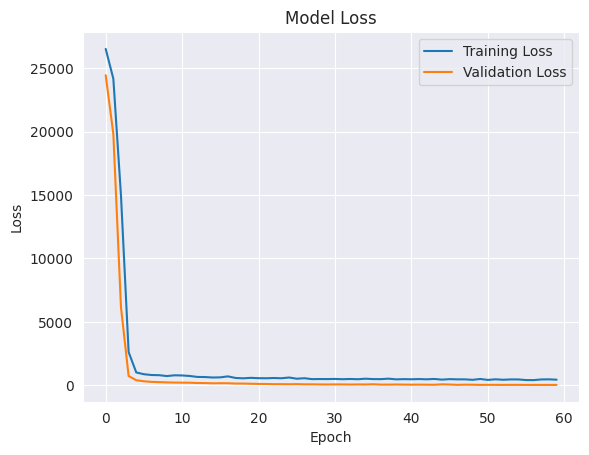

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()  # Add a legend to differentiate between training and validation loss
plt.show()

In [ ]:
y_pred_FFNN = FFNN_model.predict(X_test_FFNN)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


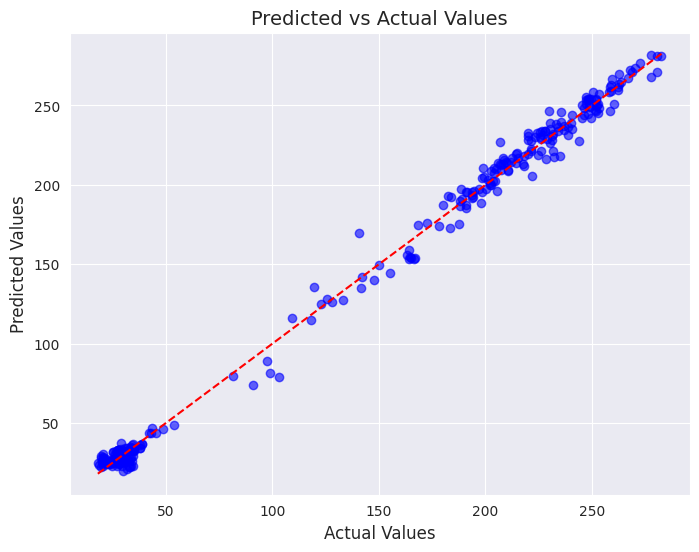

In [ ]:
#Plotting
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_FFNN, y_pred_FFNN, color='blue', alpha=0.6)

# Plot a 45-degree line (perfect predictions)
plt.plot([y_test_FFNN.min(), y_test_FFNN.max()], [y_test_FFNN.min(), y_test_FFNN.max()], color='red', linestyle='--')

# Labels and title
plt.title('Predicted vs Actual Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

#Blue points: These represent the predicted values (on the y-axis) vs. the actual values (on the x-axis) for each data point in the test set.
#Red dashed line: This is the 45-degree line (a line where the predicted value equals the actual value). It acts as a benchmark for perfect predictions. If all the points were on this line, it would mean your model's predictions were exactly correct.
#Scatter Plot: The points in the plot are very close to the 45-degree red dashed line, indicating that the model’s predictions are almost perfect. This suggests that the model is well-tuned and can predict the opening prices with very little error.

In [ ]:
#Evaluate the FFNN Model
from sklearn.metrics import mean_squared_error, r2_score

mse_FFNN = mean_squared_error(y_test_FFNN, y_pred_FFNN)
r2_FFNN = r2_score(y_test_FFNN, y_pred_FFNN)

print("Mean Squared Error:", mse_FFNN)
print("R2 Score:", r2_FFNN)

Mean Squared Error: 36.73728822062135
R2 Score: 0.9960791497535685


# **RECURRENT NEURAL NETWORK (RNN)**

# **Split Data into Training and Testing sets**

In [ ]:
# Define the split index
split_index = int(len(df) * 0.8)

# Ensures the data is split in chronological order, which is crucial for time-series data.
# Split into training and testing sets
dataset_train = df.iloc[:split_index]  # First 80% for training
dataset_test = df.iloc[split_index:]  # Remaining 20% for testing

# Display the shapes of the splits
print(f"Training Set: {dataset_train.shape}")
print(f"Testing Set: {dataset_test.shape}")

Training Set: (1353, 11)
Testing Set: (339, 11)


In [ ]:
print(dataset_train.head(3))
print("\n")
print(dataset_train.isnull().sum())
print("\n")
print(dataset_train.info())
print("\n")
print(dataset_train.describe())

        Date       Open   High        Low      Close    Volume  Adj Close  \
0  6/29/2010  19.000000  25.00  17.540001  23.889999  18766300  23.889999   
1  6/30/2010  25.790001  30.42  23.299999  23.830000  17187100  23.830000   
2   7/1/2010  25.000000  25.92  20.270000  21.959999   8218800  21.959999   

         GDP   BIR       CPI    IR  
0  14980.193  1.83  0.020038  0.52  
1  14980.193  1.82  0.020038  0.52  
2  15141.607  1.75  0.052955  0.41  


Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
GDP          0
BIR          0
CPI          0
IR           0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1353 non-null   object 
 1   Open       1353 non-null   float64
 2   High       1353 non-null   float64
 3   Low        1353 non-null   float64
 4   Close    

In [ ]:
print(dataset_test.head(3))
print("\n")
print(dataset_test.isnull().sum())
print("\n")
print(dataset_test.info())
print("\n")
print(dataset_test.describe())

            Date        Open        High         Low       Close   Volume  \
1353  11/11/2015  217.770004  219.479996  213.630005  219.080002  3347800   
1354  11/12/2015  217.850006  219.000000  212.660004  212.940002  2915900   
1355  11/13/2015  212.949997  212.990005  206.520004  207.190002  3430300   

       Adj Close        GDP   BIR       CPI    IR  
1353  219.080002  18435.137  2.09  0.090472  0.25  
1354  212.940002  18435.137  1.54  0.090472  0.25  
1355  207.190002  18435.137  1.52  0.090472  0.25  


Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
GDP          0
BIR          0
CPI          0
IR           0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 1353 to 1691
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       339 non-null    object 
 1   Open       339 non-null    float64
 2   High       339 non-null    

In [ ]:
# Training data should have "Open" value
dataset_train.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,GDP,BIR,CPI,IR
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,14980.193,1.83,0.020038,0.52
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,14980.193,1.82,0.020038,0.52


In [ ]:
# Training_set get all rows and "1:2" mean get the "Open" column
training_set = dataset_train.iloc[:, 1:2]
print(training_set.shape)

(1353, 1)


# **Converting into Numpy Array**

In [ ]:
training_set.values

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [230.699997],
       [232.990005],
       [223.479996]])

# **Normalize the training set**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
# feature_range = (0, 1), it can scale between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[:5])

[[0.01053291]
 [0.03553936]
 [0.03262991]
 [0.02526425]
 [0.01421574]]


In [ ]:
training_set_scaled.shape

(1353, 1)

# **X_train_RNN and Y_train_RNN**

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train_RNN = []
y_train_RNN = []

for i in range(60, training_set_scaled.shape[0]):
    # X_train 0-59
    X_train_RNN.append(training_set_scaled[i-60:i, 0])
    # Y_train would be 60th value based on past 60 values (Need to take the 60th value, we need to look 60 timesteps back)
    # The 0 means that we pick the first column, the "Open" column
    y_train_RNN.append(training_set_scaled[i, 0])

# Convert into Numpy Array
X_train_RNN, y_train_RNN = np.array(X_train_RNN), np.array(y_train_RNN)
print(X_train_RNN.shape)
print(y_train_RNN.shape)

# 60 means 60 timesteps back
# 1293 is the expected output or true output

(1293, 60)
(1293,)


# **Apply Reshaping**

In [ ]:
# Shape should be Number of [Datapoints, Steps (How many steps want to back), 1 (only one feature column because only use 1 column Open, if 2 columns it should be 2)]
# Reshaping
X_train_RNN = np.reshape(X_train_RNN, newshape=(X_train_RNN.shape[0], X_train_RNN.shape[1], 1))
print(X_train_RNN.shape)

(1293, 60, 1)


# **Building RNN**

In [ ]:
# Importing the Keras libraries and packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout, BatchNormalization

In [ ]:
# Initialising the RNN
regressor = Sequential()

# Adding the first SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, return_sequences = True,
                        input_shape = (X_train_RNN.shape[1], 1)))
regressor.add(BatchNormalization()) # BatchNormalization is used for preventing overfitting technique
regressor.add(Dropout(0.2)) # Dropout is used for preventing overfitting technique

# Adding the second SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, return_sequences = True))
regressor.add(BatchNormalization()) # BatchNormalization is used for preventing overfitting technique
regressor.add(Dropout(0.2)) # Dropout is used for preventing overfitting technique

# Adding the third SimpleRNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units = 50, return_sequences = False))
regressor.add(BatchNormalization()) # BatchNormalization is used for preventing overfitting technique
regressor.add(Dropout(0.2)) # Dropout is used for preventing overfitting technique

# Adding the output layer and some Dropout regularisation
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Fitting the RNN to the Training set
history = regressor.fit(X_train_RNN, y_train_RNN, epochs = 60, batch_size = 16, validation_split=0.1)

Epoch 1/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 1.5695 - val_loss: 0.0853
Epoch 2/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.5469 - val_loss: 0.0969
Epoch 3/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3411 - val_loss: 0.0282
Epoch 4/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.3416 - val_loss: 0.0127
Epoch 5/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2436 - val_loss: 0.0170
Epoch 6/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.2060 - val_loss: 0.0137
Epoch 7/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2070 - val_loss: 0.0182
Epoch 8/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.1593 - val_loss: 0.0181
Epoch 9/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1573 - val_loss: 0.0120
Epoch 10/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 0.1021 - val_loss: 0.0221
Epoch 11/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0945 - val_loss: 0.0275
Epoch 12/60
73/73 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.0

In [ ]:
regressor.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_12 (SimpleRNN)            │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 60, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_13 (SimpleRNN)            │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 60, 50)              │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_14 (SimpleRNN)            │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 50)                  │             200 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 39,455 (154.12 KB)

 Trainable params: 13,051 (50.98 KB)

 Non-trainable params: 300 (1.17 KB)

 Optimizer params: 26,104 (101.97 KB)

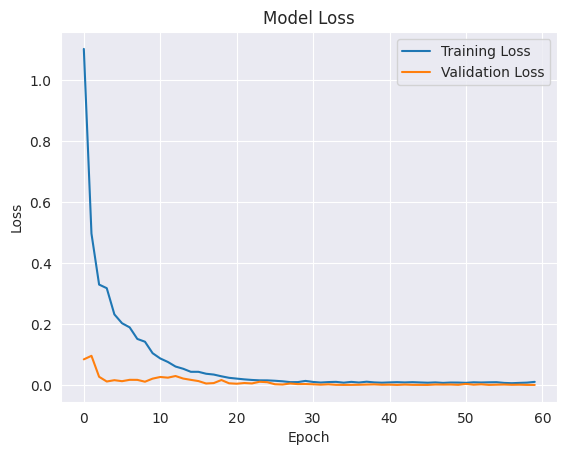

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()  # Add a legend to differentiate between training and validation loss
plt.show()

# **Making the predictions and visualizing the results**

In [ ]:
dataset_test.head(2)
real_stock_price = dataset_test.iloc[:, 1:2].values
print(real_stock_price.shape)
print(real_stock_price.T)

(339, 1)
[[217.770004 217.850006 212.949997 206.089996 215.199997 214.5
  220.539993 223.490005 217.350006 215.369995 221.339996 231.059998
  231.789993 231.059998 237.       235.479996 232.460007 227.699997
  227.520004 226.699997 224.710007 225.240005 217.509995 221.820007
  222.100006 233.940002 232.889999 231.690002 234.990005 232.179993
  230.559998 231.490005 230.059998 236.600006 238.509995 230.720001
  226.360001 220.       214.190002 217.860001 214.009995 211.600006
  212.009995 202.210007 198.970001 208.710007 199.399994 201.550003
  204.800003 200.059998 196.699997 192.380005 190.789993 189.949997
  188.759995 192.419998 183.589996 170.699997 171.300003 157.100006
  142.320007 150.5      152.       155.       158.699997 159.
  172.419998 163.660004 170.119995 176.160004 172.75     178.649994
  188.699997 192.399994 194.25     183.729996 188.279999 198.
  197.679993 203.5      204.520004 210.       207.929993 212.649994
  214.270004 218.       221.470001 229.100006 235.339996

In [ ]:
dataset_test.shape

(339, 11)

# **Combine Train and Test Dataset into 1 DataFrame**

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)

In [ ]:
dataset_total.shape

(1692,)

In [ ]:
# Getting the predicted stock price
# len(dataset_total) --> Total 1692 rows
# len(dataset_test) --> 339 rows
# result When we subtract we get Original Dataset
# We need previous 60 to predict New so we do -60 (60 timesteps back)
# That would be the inputs
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

# Need to Reshape (1 because there is 1 feature column only)
inputs = inputs.reshape(-1, 1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 399):
  X_test.append(inputs[i-60:i, 0])

# Convert into Numpy array
X_test = np.array(X_test)
print(X_test.shape)
print("\n")

# Reshape before passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print("\n")

# Pass to Model
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price.shape)
print(predicted_stock_price.T)
print("\n")

#Do inverse Transformation to get Values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.T)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


(339, 60)


(339, 60, 1)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
(339, 1)
[[0.8068496  0.80217534 0.78942615 0.76767427 0.73985225 0.7184706
  0.707054   0.7044395  0.7145642  0.7274686  0.7368423  0.74733645
  0.75999963 0.7786907  0.79250807 0.80599964 0.81780297 0.82263726
  0.820587   0.8119926  0.80144984 0.78923357 0.77724266 0.76509786
  0.7523397  0.7477896  0.75119376 0.76801664 0.7844062  0.8003922
  0.8138535  0.8167019  0.818098   0.8132399  0.8111672  0.8141487
  0.81459475 0.8085313  0.7972458  0.77615035 0.7555121  0.73796093
  0.72158813 0.71166337 0.70124304 0.6900566  0.6855054  0.6813017
  0.6782981  0.68049455 0.6799584  0.6789317  0.6747265  0.6679437
  0.6611935  0.65405625 0.65093464 0.6458652  0.63570833 0.6263441
  0.6094988  0.5857069  0.5663648  0.54518676 0.5274358  0.5181199
  0.5147108  0.5249649  0.5375075  0.5551936  0.58136535 0.59809756
  0.61263794 0.6262927  0.6394193  0.6522514  0.65741456 0.6592295
  0.66289103 0.6659125  0.67298734 0.683671   0.

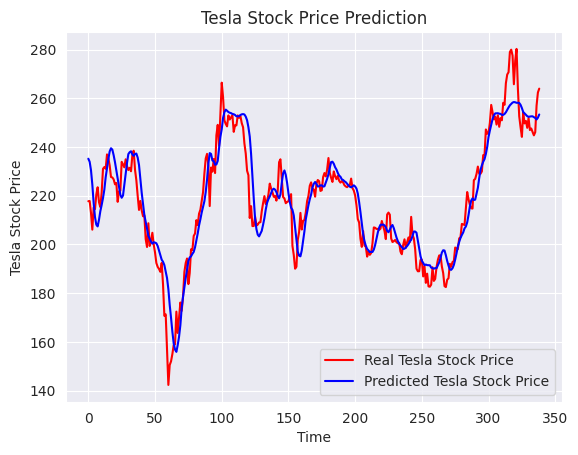

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label =
         'Predicted Tesla Stock Price')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_RNN = mean_squared_error(real_stock_price,predicted_stock_price)
r2_RNN = r2_score(real_stock_price,predicted_stock_price)
print("Mean Squared Error: ", mse_RNN)
print("R2 Score: ", r2_RNN)

Mean Squared Error:  74.97687399635196
R2 Score:  0.8743894478669002


# **OTHER ALGORITHMS: LINEAR REGRESSION, SVM REGRESSION, DECISION TREE, RANDOM FOREST (with timeseries)**

# **Split Data into Training and Testing sets**

In [ ]:
# Define the split index
split_index = int(len(df) * 0.8)

# Ensures the data is split in chronological order, which is crucial for time-series data.
# Split into training and testing sets
dataset_train_other = df.iloc[:split_index]  # First 80% for training
dataset_test_other = df.iloc[split_index:]  # Remaining 20% for testing

# Display the shapes of the splits
print(f"Training Set: {dataset_train_other.shape}")
print(f"Testing Set: {dataset_test_other.shape}")

Training Set: (1353, 11)
Testing Set: (339, 11)


In [ ]:
# Training data should have "Open" value
dataset_train_other.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,GDP,BIR,CPI,IR
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,14980.193,1.83,0.020038,0.52
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,14980.193,1.82,0.020038,0.52


In [ ]:
# Training_set get all rows and "1:2" mean get the "Open" column
training_set_other = dataset_train_other.iloc[:, 1:2]
print(training_set_other.shape)

(1353, 1)


# **Convert into Numpy Array**

In [ ]:
training_set_other.values

array([[ 19.      ],
       [ 25.790001],
       [ 25.      ],
       ...,
       [230.699997],
       [232.990005],
       [223.479996]])

# **Normalize the training set**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
# feature_range = (0, 1), it can scale between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled_other = sc.fit_transform(training_set_other)
print(training_set_scaled_other[:5])

[[0.01053291]
 [0.03553936]
 [0.03262991]
 [0.02526425]
 [0.01421574]]


In [ ]:
training_set_scaled_other.shape

(1353, 1)

# **X_train_other and Y_train_other**

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train_other = []
y_train_other = []

for i in range(60, training_set_scaled_other.shape[0]):
    # X_train 0-59
    X_train_other.append(training_set_scaled_other[i-60:i, 0])
    # Y_train would be 60th value based on past 60 values (Need to take the 60th value, we need to look 60 timesteps back)
    # The 0 means that we pick the first column, the "Open" column
    y_train_other.append(training_set_scaled_other[i, 0])

# Convert into Numpy Array
X_train_other, y_train_other = np.array(X_train_other), np.array(y_train_other)
print(X_train_other.shape)
print(y_train_other.shape)

# 60 means 60 timesteps back
# 1293 is the expected output or true output

(1293, 60)
(1293,)


# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

# Fitting the Linear Regression to the Training set
LR_model.fit(X_train_other, y_train_other)

LinearRegression()

In [ ]:
dataset_test_other.head(2)
real_stock_price = dataset_test_other.iloc[:, 1:2].values
print(real_stock_price.shape)
print(real_stock_price.T)

(339, 1)
[[217.770004 217.850006 212.949997 206.089996 215.199997 214.5
  220.539993 223.490005 217.350006 215.369995 221.339996 231.059998
  231.789993 231.059998 237.       235.479996 232.460007 227.699997
  227.520004 226.699997 224.710007 225.240005 217.509995 221.820007
  222.100006 233.940002 232.889999 231.690002 234.990005 232.179993
  230.559998 231.490005 230.059998 236.600006 238.509995 230.720001
  226.360001 220.       214.190002 217.860001 214.009995 211.600006
  212.009995 202.210007 198.970001 208.710007 199.399994 201.550003
  204.800003 200.059998 196.699997 192.380005 190.789993 189.949997
  188.759995 192.419998 183.589996 170.699997 171.300003 157.100006
  142.320007 150.5      152.       155.       158.699997 159.
  172.419998 163.660004 170.119995 176.160004 172.75     178.649994
  188.699997 192.399994 194.25     183.729996 188.279999 198.
  197.679993 203.5      204.520004 210.       207.929993 212.649994
  214.270004 218.       221.470001 229.100006 235.339996

In [ ]:
dataset_test_other.shape

(339, 11)

In [ ]:
dataset_total_other = pd.concat((dataset_train_other['Open'], dataset_test_other['Open']), axis=0)

In [ ]:
dataset_total_other.shape

(1692,)

In [ ]:
# Getting the predicted stock price
# len(dataset_total) --> Total 1692 rows
# len(dataset_test) --> 339 rows
# result When we subtract we get Original Dataset
# We need previous 60 to predict New so we do -60 (60 timesteps back)
# That would be the inputs
inputs = dataset_total_other[len(dataset_total_other) - len(dataset_test_other) - 60:].values

# Need to Reshape (1 because there is 1 feature column only)
inputs = inputs.reshape(-1, 1)

# Normalize the Dataset
inputs = sc.transform(inputs)
print(inputs.shape)

X_test = []
for i in range(60, 399):
  X_test.append(inputs[i-60:i, 0])

# Convert into Numpy array
X_test = np.array(X_test)
print(X_test.shape)
print("\n")

# # # Reshape before passing to Network
# X_test = np.reshape(-1, 1)
# print(X_test.shape)
# print("\n")

# Pass to Model
predicted_stock_price_LR = LR_model.predict(X_test)
print(predicted_stock_price_LR.shape)
print(predicted_stock_price_LR.T)
print("\n")

predicted_stock_price_LR = predicted_stock_price_LR.reshape(-1, 1)

#Do inverse Transformation to get Values
predicted_stock_price_LR = sc.inverse_transform(predicted_stock_price_LR)
print(predicted_stock_price_LR.T)

(399, 1)
(339, 60)


(339,)
[0.77489028 0.73442105 0.75647329 0.72788188 0.71211926 0.73508803
 0.73847238 0.74654497 0.76624413 0.73534542 0.73706066 0.74699162
 0.79162247 0.79837071 0.79171928 0.81739876 0.82050882 0.79178231
 0.77397525 0.78549468 0.77448643 0.77497342 0.77354508 0.7442668
 0.74497219 0.75999957 0.80152137 0.78646971 0.79904871 0.8058324
 0.79847501 0.78401694 0.78927581 0.78626022 0.80304092 0.82209242
 0.80179971 0.78019326 0.74790205 0.73613501 0.73016777 0.71782853
 0.71841746 0.73057543 0.69198441 0.67526628 0.70768623 0.67579773
 0.67672284 0.70080716 0.68292521 0.66705766 0.65176645 0.64854816
 0.63768991 0.63188876 0.64331505 0.61372323 0.56823811 0.57392758
 0.52472015 0.46594603 0.49601876 0.50338123 0.51576512 0.51724776
 0.53764205 0.57744478 0.53657678 0.56484452 0.58454061 0.57585457
 0.59452484 0.63731312 0.65352927 0.64356343 0.6198242  0.63798768
 0.65835719 0.66397464 0.70257604 0.69068858 0.71507844 0.71344216
 0.7251024  0.7226472  0.74515113 0.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


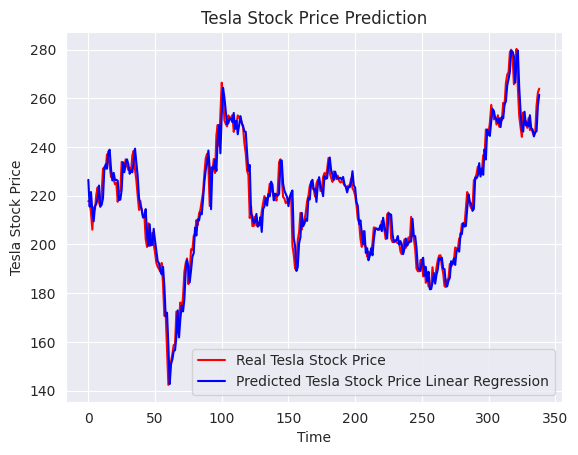

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price_LR, color = 'blue', label =
         'Predicted Tesla Stock Price Linear Regression')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_LR_TS = mean_squared_error(real_stock_price,predicted_stock_price_LR)
r2_LR_TS = r2_score(real_stock_price,predicted_stock_price_LR)
print("Mean Squared Error of Linear Regression Timeseries: ", mse_LR_TS)
print("R2 Score of Linear Regression Timeseries: ", r2_LR_TS)

Mean Squared Error of Linear Regression Timeseries:  31.298786315114175
R2 Score of Linear Regression Timeseries:  0.9475643939179341


# **SVM Regression (SVR)**

In [ ]:
from sklearn.svm import SVR

# Initialize the SVR model
svm_model_TS = SVR(kernel='rbf', C=1.0, epsilon=0.1) # `C=1.0` and `epsilon=0.1` are reasonable values

# Fit the model to the training data
svm_model_TS.fit(X_train_other, y_train_other)

SVR()

In [ ]:
# Getting the predicted stock price
# len(dataset_total) --> Total 1692 rows
# len(dataset_test) --> 339 rows
# result When we subtract we get Original Dataset
# We need previous 60 to predict New so we do -60 (60 timesteps back)
# That would be the inputs
inputs = dataset_total_other[len(dataset_total_other) - len(dataset_test_other) - 60:].values

# Need to Reshape (1 because there is 1 feature column only)
inputs = inputs.reshape(-1, 1)

# Normalize the Dataset
inputs = sc.transform(inputs)
print(inputs.shape)

X_test = []
for i in range(60, 399):
  X_test.append(inputs[i-60:i, 0])

# Convert into Numpy array
X_test = np.array(X_test)
print(X_test.shape)
print("\n")

# # # Reshape before passing to Network
# X_test = np.reshape(-1, 1)
# print(X_test.shape)
# print("\n")

# Pass to Model
predicted_stock_price_SVM = svm_model_TS.predict(X_test)
print(predicted_stock_price_SVM.shape)
print(predicted_stock_price_SVM.T)
print("\n")

predicted_stock_price_SVM = predicted_stock_price_SVM.reshape(-1, 1)

#Do inverse Transformation to get Values
predicted_stock_price_SVM = sc.inverse_transform(predicted_stock_price_SVM)
print(predicted_stock_price_SVM.T)

(399, 1)
(339, 60)


(339,)
[0.73663915 0.73824796 0.74389187 0.74501992 0.74342655 0.74714114
 0.75036505 0.75312301 0.75706012 0.75465601 0.75367295 0.75540934
 0.76111241 0.76759229 0.77291906 0.78173714 0.78946066 0.79375425
 0.79415664 0.79582291 0.79695628 0.79584044 0.79611482 0.7912927
 0.78989004 0.78823867 0.79123192 0.79329062 0.79267913 0.79646641
 0.79911149 0.79898437 0.80183104 0.80309627 0.80915658 0.81372252
 0.81417775 0.81312797 0.80841641 0.80136038 0.79466186 0.78590464
 0.77603671 0.76968017 0.75867626 0.7471619  0.7430626  0.73335579
 0.72513913 0.720933   0.71369065 0.70783058 0.70082366 0.69420051
 0.68710944 0.67891767 0.67445762 0.66515529 0.64988906 0.63770607
 0.61964958 0.59531601 0.57922023 0.56642558 0.55509848 0.54685593
 0.54060756 0.54244853 0.53763771 0.53691611 0.54241719 0.5450618
 0.55200442 0.56523593 0.57896619 0.59006698 0.59369491 0.60298964
 0.61481567 0.62322138 0.63562507 0.64658562 0.65941814 0.66954089
 0.68263838 0.6960684  0.70958954 0.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


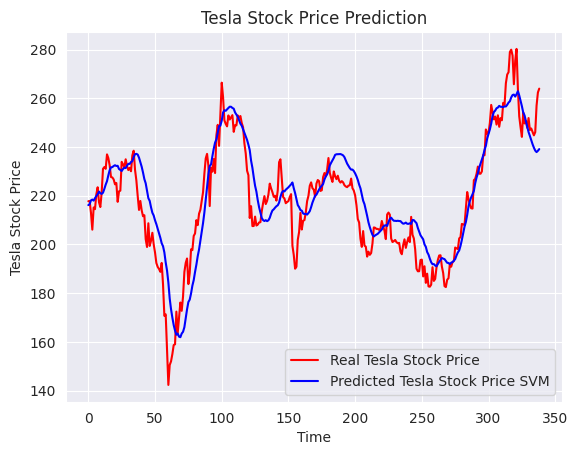

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price_SVM, color = 'blue', label =
         'Predicted Tesla Stock Price SVM')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_SVM_TS = mean_squared_error(real_stock_price,predicted_stock_price_SVM)
r2_SVM_TS = r2_score(real_stock_price,predicted_stock_price_SVM)
print("Mean Squared Error of SVM Timeseries: ", mse_SVM_TS)
print("R2 Score of SVM Timeseries: ", r2_SVM_TS)

Mean Squared Error of SVM Timeseries:  119.7166984530242
R2 Score of SVM Timeseries:  0.7994357487754444


# **Decision Tree**

In [ ]:
# Decision Tree method
from sklearn.tree import DecisionTreeRegressor

tree_reg_TS = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_leaf_nodes=50,
    random_state=42)

tree_reg_TS.fit(X_train_other, y_train_other)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=50, min_samples_leaf=5,
                      min_samples_split=10, random_state=42)

In [ ]:
# Getting the predicted stock price
# len(dataset_total) --> Total 1692 rows
# len(dataset_test) --> 339 rows
# result When we subtract we get Original Dataset
# We need previous 60 to predict New so we do -60 (60 timesteps back)
# That would be the inputs
inputs = dataset_total_other[len(dataset_total_other) - len(dataset_test_other) - 60:].values

# Need to Reshape (1 because there is 1 feature column only)
inputs = inputs.reshape(-1, 1)

# Normalize the Dataset
inputs = sc.transform(inputs)
print(inputs.shape)

X_test = []
for i in range(60, 399):
  X_test.append(inputs[i-60:i, 0])

# Convert into Numpy array
X_test = np.array(X_test)
print(X_test.shape)
print("\n")

# # # Reshape before passing to Network
# X_test = np.reshape(-1, 1)
# print(X_test.shape)
# print("\n")

# Pass to Model
predicted_stock_price_DecisionTree = tree_reg_TS.predict(X_test)
print(predicted_stock_price_DecisionTree.shape)
print(predicted_stock_price_DecisionTree.T)
print("\n")

predicted_stock_price_DecisionTree = predicted_stock_price_DecisionTree.reshape(-1, 1)

#Do inverse Transformation to get Values
predicted_stock_price_DecisionTree = sc.inverse_transform(predicted_stock_price_DecisionTree)
print(predicted_stock_price_DecisionTree.T)

(399, 1)
(339, 60)


(339,)
[0.75970008 0.75970008 0.75970008 0.71371629 0.71371629 0.71371629
 0.71371629 0.75970008 0.75970008 0.75970008 0.71371629 0.75970008
 0.79542753 0.79542753 0.79542753 0.82790206 0.79542753 0.79542753
 0.75970008 0.75970008 0.75970008 0.75970008 0.75970008 0.75970008
 0.75970008 0.75970008 0.79542753 0.79542753 0.79542753 0.79542753
 0.79542753 0.79542753 0.79542753 0.79542753 0.79542753 0.82790206
 0.79542753 0.75970008 0.75970008 0.71371629 0.75970008 0.71371629
 0.71371629 0.71371629 0.68151051 0.68151051 0.71371629 0.68151051
 0.68151051 0.71371629 0.68151051 0.68151051 0.65290266 0.65290266
 0.65290266 0.65290266 0.65290266 0.65290266 0.59432963 0.59432963
 0.55406589 0.45776938 0.45776938 0.45776938 0.45776938 0.55406589
 0.55406589 0.59432963 0.55406589 0.55406589 0.59432963 0.59432963
 0.59432963 0.65290266 0.65290266 0.65290266 0.65290266 0.65290266
 0.68151051 0.68151051 0.68151051 0.71371629 0.71371629 0.71371629
 0.71371629 0.71371629 0.75970008 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


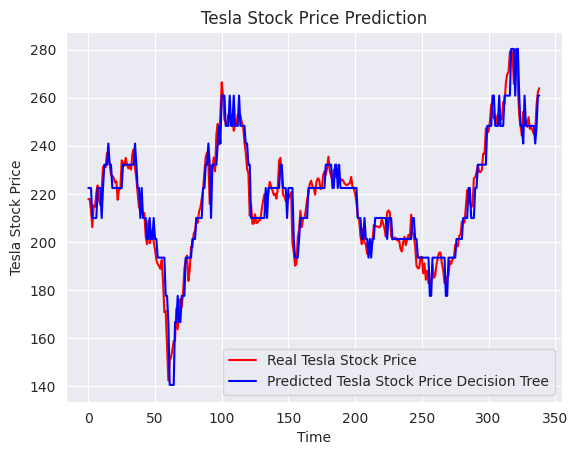

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price_DecisionTree, color = 'blue', label =
         'Predicted Tesla Stock Price Decision Tree')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_DecisionTree_TS = mean_squared_error(real_stock_price,predicted_stock_price_DecisionTree)
r2_DecisionTree_TS = r2_score(real_stock_price,predicted_stock_price_DecisionTree)
print("Mean Squared Error of Decision Tree Timeseries: ", mse_DecisionTree_TS)
print("R2 Score of Decision Tree Timeseries: ", r2_DecisionTree_TS)

Mean Squared Error of Decision Tree Timeseries:  43.5740433930627
R2 Score of Decision Tree Timeseries:  0.9269993618360167


# **Random Forest**

In [ ]:
# Regression - Random Forest method
from sklearn.ensemble import RandomForestRegressor

forest_reg_TS = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

forest_reg_TS.fit(X_train_other, y_train_other)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, random_state=42)

In [ ]:
# Getting the predicted stock price
# len(dataset_total) --> Total 1692 rows
# len(dataset_test) --> 339 rows
# result When we subtract we get Original Dataset
# We need previous 60 to predict New so we do -60 (60 timesteps back)
# That would be the inputs
inputs = dataset_total_other[len(dataset_total_other) - len(dataset_test_other) - 60:].values

# Need to Reshape (1 because there is 1 feature column only)
inputs = inputs.reshape(-1, 1)

# Normalize the Dataset
inputs = sc.transform(inputs)
print(inputs.shape)

X_test = []
for i in range(60, 399):
  X_test.append(inputs[i-60:i, 0])

# Convert into Numpy array
X_test = np.array(X_test)
print(X_test.shape)
print("\n")

# # # Reshape before passing to Network
# X_test = np.reshape(-1, 1)
# print(X_test.shape)
# print("\n")

# Pass to Model
predicted_stock_price_RandomForest = forest_reg_TS.predict(X_test)
print(predicted_stock_price_RandomForest.shape)
print(predicted_stock_price_RandomForest.T)
print("\n")

predicted_stock_price_RandomForest = predicted_stock_price_RandomForest.reshape(-1, 1)

#Do inverse Transformation to get Values
predicted_stock_price_RandomForest = sc.inverse_transform(predicted_stock_price_RandomForest)
print(predicted_stock_price_RandomForest.T)

(399, 1)
(339, 60)


(339,)
[0.78352403 0.77469358 0.75916892 0.74136274 0.72512299 0.72947071
 0.72668259 0.7347667  0.74019927 0.73200725 0.72180525 0.72847318
 0.75486277 0.76479537 0.77153135 0.78714329 0.79673806 0.80015379
 0.79414369 0.7811354  0.7705693  0.76361511 0.76315234 0.75795709
 0.75734792 0.75368687 0.7678282  0.78242896 0.78819077 0.79488868
 0.80427503 0.79687566 0.7941776  0.79631976 0.80884836 0.8127958
 0.81433258 0.80364779 0.79470818 0.77272303 0.76074584 0.75155169
 0.74130296 0.732506   0.71421055 0.70110453 0.70212732 0.69876618
 0.6937095  0.69752219 0.6975178  0.69031252 0.67840116 0.67819857
 0.6804111  0.67428695 0.67504154 0.67219187 0.66238433 0.65815214
 0.64114641 0.6213598  0.59866858 0.5751188  0.56460293 0.56169731
 0.54851872 0.54482654 0.55231097 0.54634746 0.55166228 0.5543516
 0.5597692  0.58081959 0.58735199 0.60926134 0.61842912 0.61566183
 0.63690777 0.64535231 0.66214468 0.67041862 0.68437419 0.6981067
 0.71378799 0.71372606 0.73430591 0.7

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


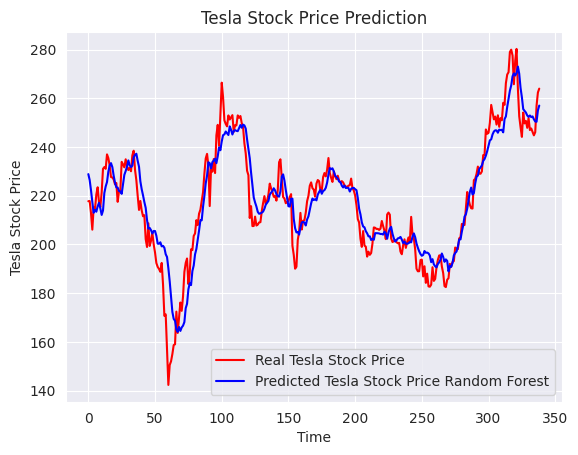

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Tesla Stock Price')
plt.plot(predicted_stock_price_RandomForest, color = 'blue', label =
         'Predicted Tesla Stock Price Random Forest')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Stock Price')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse_RandomForest_TS = mean_squared_error(real_stock_price,predicted_stock_price_RandomForest)
r2_RandomForest_TS = r2_score(real_stock_price,predicted_stock_price_RandomForest)
print("Mean Squared Error of Random Forest Timeseries: ", mse_RandomForest_TS)
print("R2 Score of Random Forest Timeseries: ", r2_RandomForest_TS)

Mean Squared Error of Random Forest Timeseries:  78.77058769766215
R2 Score of Random Forest Timeseries:  0.8680337484724487


# **OTHER ALGORITHMS: LINEAR REGRESSION, SVM REGRESSION, DECISION TREE, RANDOM FOREST (without explicit temporal relationships)**

# **Preprocessing**

In [ ]:
# Separate data into features(X) and targets Opening Price for regression (y)
X = df.drop(columns=['Open', 'Date'])
y = df['Open']

In [ ]:
# Normalizing the data (Technique for Preventing Overfitting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[0])

[-1.14741887 -1.21145004 -1.15117251  3.3752191  -1.15117251 -1.59925081
 -0.57034527 -1.35712371  1.0061007 ]


# **Split The Data Into Training And Test Sets**

In [ ]:
# Split the data into training and evaluation sets for Regression
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

# **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

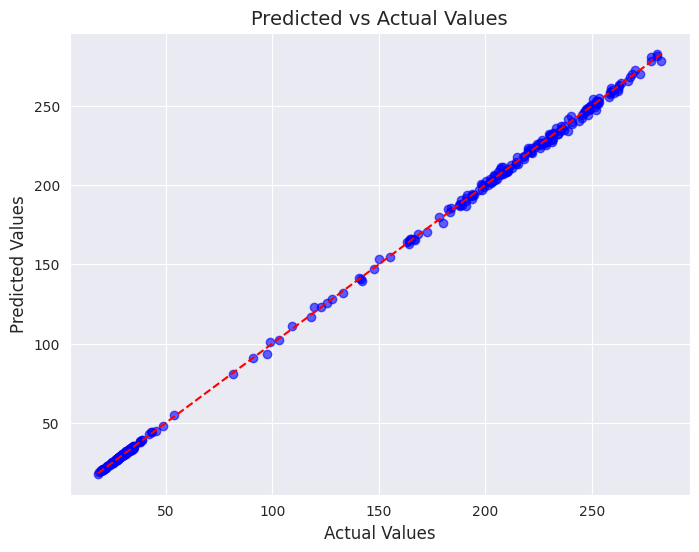

In [ ]:
#Plotting
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)

# Plot a 45-degree line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Labels and title
plt.title('Predicted vs Actual Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

#Blue points: These represent the predicted values (on the y-axis) vs. the actual values (on the x-axis) for each data point in the test set.
#Red dashed line: This is the 45-degree line (a line where the predicted value equals the actual value). It acts as a benchmark for perfect predictions. If all the points were on this line, it would mean your model's predictions were exactly correct.
#Scatter Plot: The points in the plot are very close to the 45-degree red dashed line, indicating that the model’s predictions are almost perfect. This suggests that the model is well-tuned and can predict the opening prices with very little error.

In [ ]:
#Evaluate the Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score

mse_LR = mean_squared_error(y_test, y_pred)
r2_LR = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_LR)
print("R2 Score:", r2_LR)

Mean Squared Error: 1.8620167303219608
R2 Score: 0.9998012730631586


# **SVM Regression (SVR)**

In [ ]:
from sklearn.svm import SVR

# Initialize the SVR model
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1) # `C=1.0` and `epsilon=0.1` are reasonable values

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test)

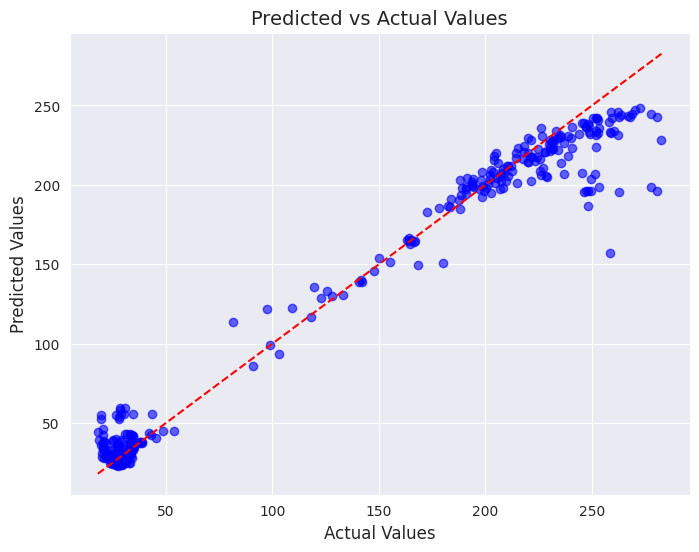

In [ ]:
#Plotting
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_svm, color='blue', alpha=0.6)

# Plot a 45-degree line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Labels and title
plt.title('Predicted vs Actual Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

#Blue points: These represent the predicted values (on the y-axis) vs. the actual values (on the x-axis) for each data point in the test set.
#Red dashed line: This is the 45-degree line (a line where the predicted value equals the actual value). It acts as a benchmark for perfect predictions. If all the points were on this line, it would mean your model's predictions were exactly correct.

In [ ]:
# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Regression - Mean Squared Error:", mse_svm)
print("SVM Regression - R2 Score:", r2_svm)

SVM Regression - Mean Squared Error: 288.44038951729544
SVM Regression - R2 Score: 0.9692157035236783


# **Decision Tree**

In [ ]:
# Decision Tree method
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    max_leaf_nodes=50,
    random_state=42)

tree_reg.fit(X_train, y_train)
y_pred_reg_tree = tree_reg.predict(X_test)

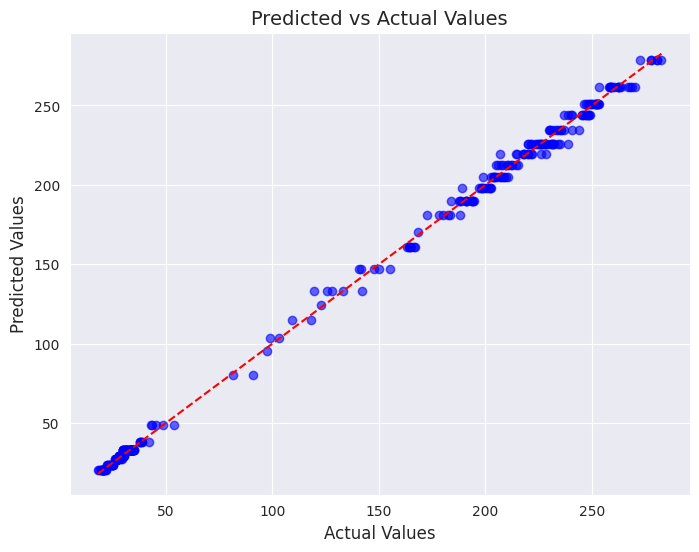

In [ ]:
#Plotting
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg_tree, color='blue', alpha=0.6)

# Plot a 45-degree line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Labels and title
plt.title('Predicted vs Actual Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

#Blue points: These represent the predicted values (on the y-axis) vs. the actual values (on the x-axis) for each data point in the test set.
#Red dashed line: This is the 45-degree line (a line where the predicted value equals the actual value). It acts as a benchmark for perfect predictions. If all the points were on this line, it would mean your model's predictions were exactly correct.

In [ ]:
# Evaluate the model
mse_tree = mean_squared_error(y_test, y_pred_reg_tree)
r2_tree = r2_score(y_test, y_pred_reg_tree)

print("Decision Tree Regression - Mean Squared Error:", mse_tree)
print("Decision Tree Regression - R2 Score:", r2_tree)

Decision Tree Regression - Mean Squared Error: 10.964781462399802
Decision Tree Regression - R2 Score: 0.9988297648470748


# **Random Forest**

In [ ]:
# Regression - Random Forest method
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',
    random_state=42
)

forest_reg.fit(X_train, y_train)
y_pred_reg_forest = forest_reg.predict(X_test)

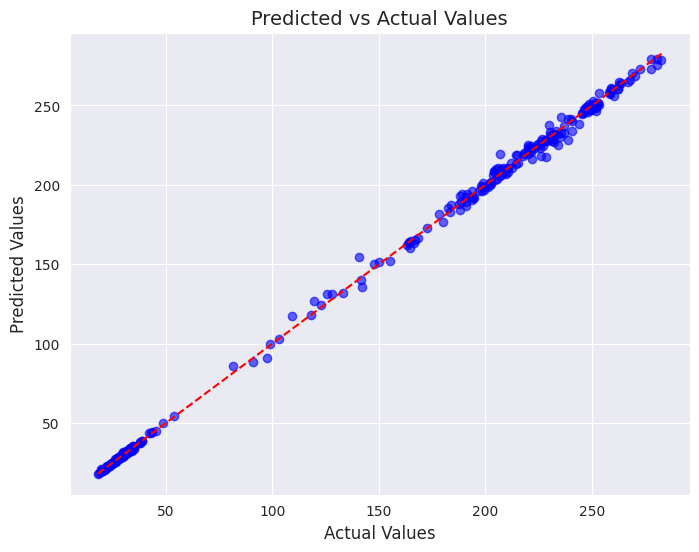

In [ ]:
#Plotting
# Scatter plot of predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_reg_forest, color='blue', alpha=0.6)

# Plot a 45-degree line (perfect predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

# Labels and title
plt.title('Predicted vs Actual Values', fontsize=14)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.grid(True)
plt.show()

#Blue points: These represent the predicted values (on the y-axis) vs. the actual values (on the x-axis) for each data point in the test set.
#Red dashed line: This is the 45-degree line (a line where the predicted value equals the actual value). It acts as a benchmark for perfect predictions. If all the points were on this line, it would mean your model's predictions were exactly correct.

In [ ]:
# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_reg_forest)
r2_forest = r2_score(y_test, y_pred_reg_forest)

print("Random Forest Regression - Mean Squared Error:", mse_forest)
print("Random Forest Regression - R2 Score:", r2_forest)

Random Forest Regression - Mean Squared Error: 6.384263118984498
Random Forest Regression - R2 Score: 0.9993186285423946


# **EVALUATION MODELS AND COMPARE**

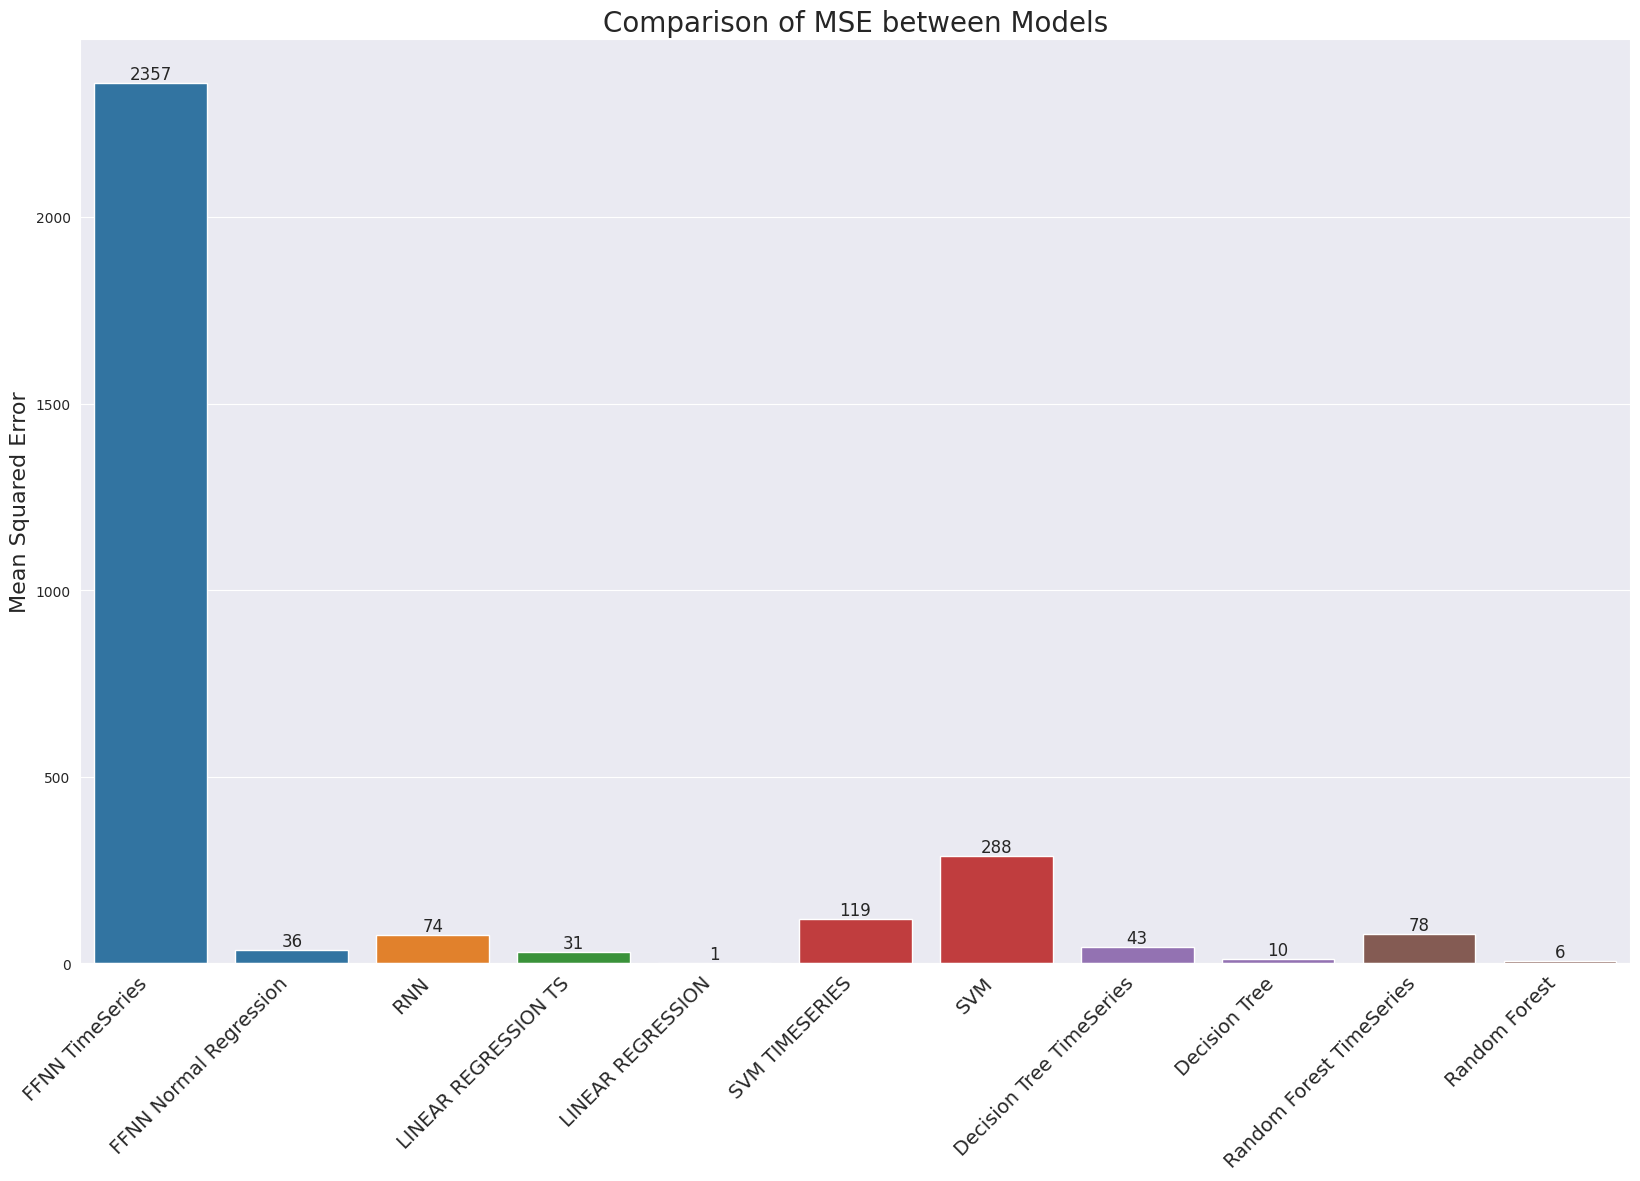

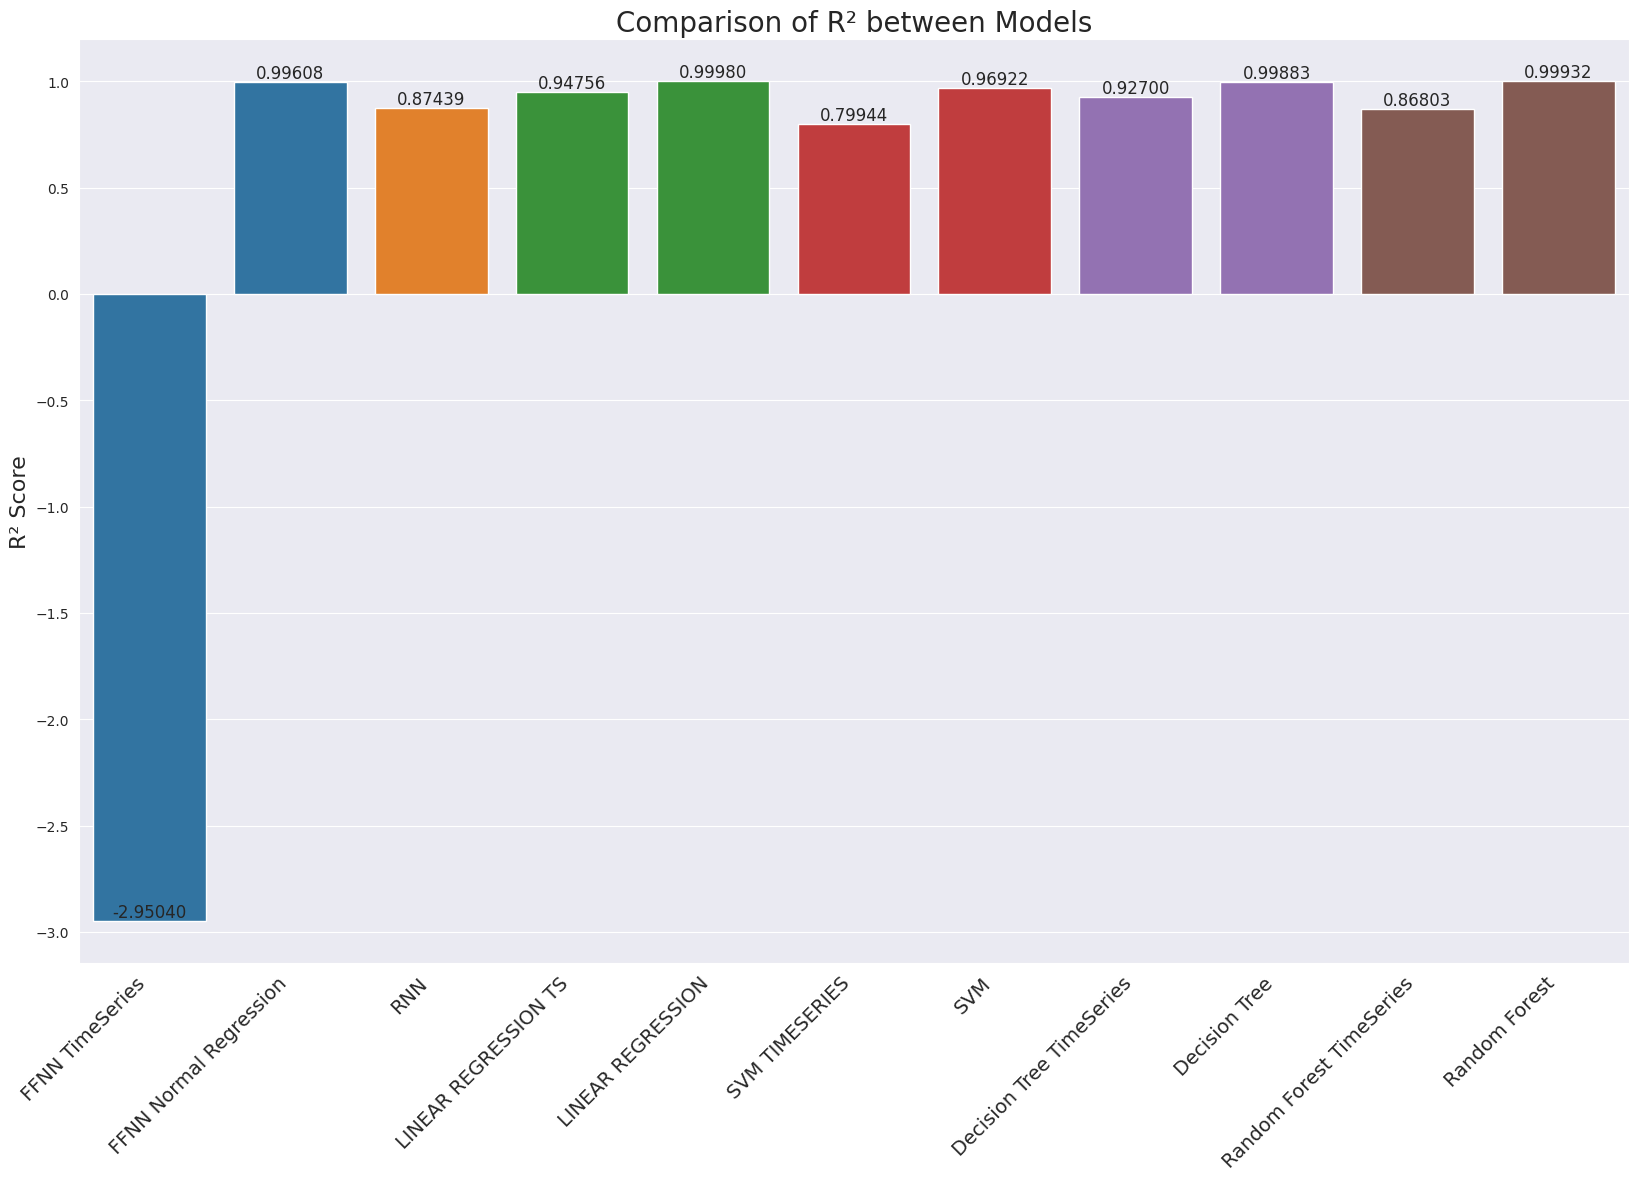

In [ ]:
# Visually display the comparison
models = ['FFNN TimeSeries', 'FFNN Normal Regression', 'RNN', 'LINEAR REGRESSION TS', 'LINEAR REGRESSION', 'SVM TIMESERIES', 'SVM', 'Decision Tree TimeSeries', 'Decision Tree', 'Random Forest TimeSeries', 'Random Forest']
mse_values = [mse_FFNN_TS, mse_FFNN, mse_RNN, mse_LR_TS, mse_LR, mse_SVM_TS, mse_svm, mse_DecisionTree_TS, mse_tree, mse_RandomForest_TS, mse_forest]
r2_values = [r2_FFNN_TS, r2_FFNN, r2_RNN, r2_LR_TS, r2_LR, r2_SVM_TS, r2_svm, r2_DecisionTree_TS, r2_tree, r2_RandomForest_TS, r2_forest]

# Define color mapping for paired models
model_types = [
    'FFNN', 'FFNN', 'RNN',
    'Linear Regression', 'Linear Regression',
    'SVM', 'SVM',
    'Decision Tree', 'Decision Tree',
    'Random Forest', 'Random Forest'
]
colors = {
    'FFNN': '#1f77b4',
    'RNN': '#ff7f0e',
    'Linear Regression': '#2ca02c',
    'SVM': '#d62728',
    'Decision Tree': '#9467bd',
    'Random Forest': '#8c564b'
}
palette = [colors[model_type] for model_type in model_types]

# Plot MSE comparison with paired colors
plt.figure(figsize=(20, 12))
ax = sns.barplot(x=models, y=mse_values, hue=model_types, palette=colors, dodge=False)
for i, v in enumerate(mse_values):
    ax.text(i, v, f'{int(v)}', ha='center', va='bottom', fontsize=12)
plt.title("Comparison of MSE between Models", fontsize=20)
plt.ylabel("Mean Squared Error", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()

# Plot R² score comparison with paired colors
plt.figure(figsize=(20, 12))
ax = sns.barplot(x=models, y=r2_values, hue=model_types, palette=colors, dodge=False)
for i, v in enumerate(r2_values):
    ax.text(i, v, f'{v:.5f}', ha='center', va='bottom', fontsize=12)
plt.title("Comparison of R² between Models", fontsize=20)
plt.ylabel("R² Score", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.legend([], [], frameon=False)  # Remove redundant legend
plt.show()